# Project: Customer Segmentation Using KNN

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#desc">Data Description</a></li>
<li><a href="#lib">Import Library</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#model">Building Model</a></li>
<li><a href="#eva">Model Evaluation</a></li>    
</ul>

<a id='intro'></a>
## Introduction
The dataset contains the details of 200 customers and is aimed at classifying the customers into smaller groups based on the similarity in thier features. 

<a id='desc'></a>
## Data Description
1. CustomerID - A unique identifier for each customer
2. Gender - The Gender of the customer as either male or female
3. Age - The age of the customer
4. Annual Income - Customer's annual income
5. Spending score: Customer's spending score

<a id='lib'></a>
## Import Library

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

<a id='wrangling'></a>
## Data Wrangling

In [7]:
df = pd.read_csv('Mall_Customers.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
df.shape

(200, 5)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

In [13]:
df.CustomerID.nunique()

200

In [14]:
df.drop(columns='CustomerID',inplace=True)

In [15]:
df['Age'].nunique()

51

In [16]:
df['Age'].describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

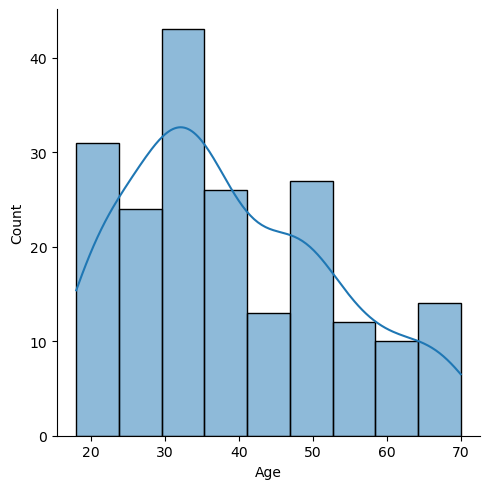

In [17]:
sns.displot(df['Age'],kind='hist',kde=True);

In [18]:
df['Annual Income (k$)'].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64

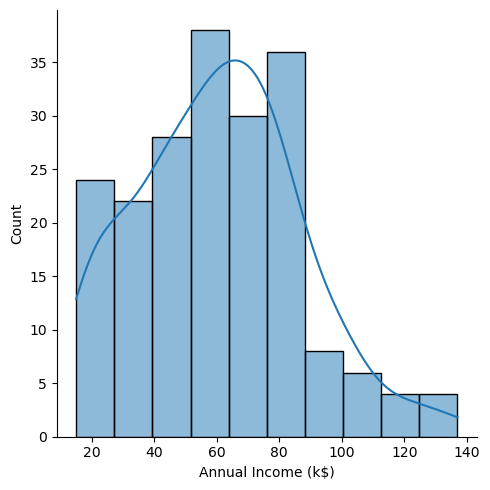

In [19]:
sns.displot(df['Annual Income (k$)'],kind='hist',kde=True);

In [20]:
df['Spending Score (1-100)'].describe()

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending Score (1-100), dtype: float64

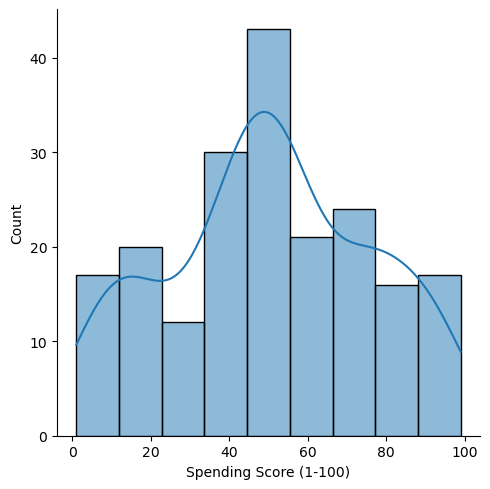

In [21]:
sns.displot(df['Spending Score (1-100)'],kind='hist',kde=True);

In [22]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

### Bivariate Analysis

In [23]:
df.corr()

C:\Users\YUSUF\AppData\Local\Temp\ipykernel_16240\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


In [24]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [25]:
gender = df.groupby('Gender')

In [26]:
gender.get_group('Male')[['Annual Income (k$)','Spending Score (1-100)','Age']].mean()

Annual Income (k$)        62.227273
Spending Score (1-100)    48.511364
Age                       39.806818
dtype: float64

In [27]:
gender.get_group('Female')[['Annual Income (k$)','Spending Score (1-100)','Age']].mean()

Annual Income (k$)        59.250000
Spending Score (1-100)    51.526786
Age                       38.098214
dtype: float64

In [28]:
mask = {'Male':0,'Female':1}
df['Gender'].replace(mask,inplace=True)


In [29]:
df.loc[df['Age'] <= 24, 'Career'] = "Early Career"
df.loc[(df['Age'] > 24) & (df['Age'] <= 40 ),'Career'] = 'Mid Level Career'
df.loc[df['Age'] > 40 ,'Career'] = 'Professional'

In [30]:
mask_car = {'Early Career':0,'Mid Level Career':1,'Professional':2}
df['Career'].replace(mask_car,inplace=True)

In [31]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Career                    0
dtype: int64

<a id='model'></a>
## Building the Model

In [32]:
X = df[['Gender', 'Career','Age', 'Annual Income (k$)']]
y = df['Spending Score (1-100)']

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=42)

In [34]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(170, 4)
(30, 4)
(170,)
(30,)


In [35]:
y_train.value_counts()

42    8
55    7
46    6
73    6
5     4
     ..
20    1
63    1
12    1
4     1
13    1
Name: Spending Score (1-100), Length: 79, dtype: int64

In [36]:
knn = KNeighborsClassifier()

In [37]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [38]:
knn.score(X_test,y_test)

0.06666666666666667

In [39]:
param = {
    'n_neighbors':range(1,11),
    'algorithm':['auto','ball_tree','kd_tree'],
    'leaf_size':range(10,60,10)
}

In [40]:
model = GridSearchCV(
                    knn,
                    param_grid=param,
                    n_jobs=-1,
                    verbose= 1
                    )

In [41]:
model.fit(X_train,y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


C:\Users\YUSUF\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                         'leaf_size': range(10, 60, 10),
                         'n_neighbors': range(1, 11)},
             verbose=1)

In [42]:
model.best_score_

0.047058823529411764

In [43]:
model.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 4}

In [47]:
X = df[['Annual Income (k$)','Spending Score (1-100)','Gender','Age']]
y = df['Career']

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(170, 4)
(30, 4)
(170,)
(30,)


In [49]:
model.fit(X_train,y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                         'leaf_size': range(10, 60, 10),
                         'n_neighbors': range(1, 11)},
             verbose=1)

In [50]:
model.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 1}

In [51]:
model.best_score_

0.8705882352941178

<a id='eva'></a>
## Model Evaluation


In [52]:
y_pred = model.predict(X_test)

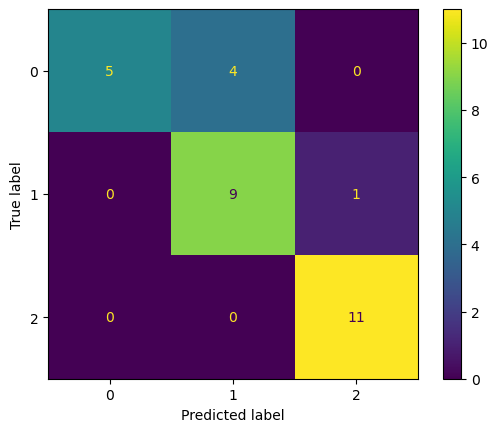

In [53]:
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test);